# KNN - Breast Cancer

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [307]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [308]:
# Response is in target and target_names

In [309]:
# Predictors are in data and feature_names

In [310]:
print(cancer.data.shape, cancer.feature_names.shape, 
      cancer.target.shape, cancer.target_names.shape)

(569, 30) (30,) (569,) (2,)


In [311]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [312]:
cancer.target[:5]

array([0, 0, 0, 0, 0])

In [313]:
# 1 is for benign tumor, 0 for malign tumor

In [314]:
n = len(cancer.target)
n

569

In [315]:
# count rows by category

In [316]:
df = pd.DataFrame(cancer.target,columns = ['tumor'])
df

,tumor
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [317]:
pd.value_counts(df.tumor)

1    357
0    212
Name: tumor, dtype: int64

In [318]:
# there are 357 patients with cancer

In [319]:
pd.value_counts(df.tumor,normalize=True)

1    0.627417
0    0.372583
Name: tumor, dtype: float64

### predictors (features) names

In [320]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [321]:
cancer.data.shape

(569, 30)

In [322]:
# Create DataFrame with the 30 predictors

In [323]:
list1 = list(cancer.feature_names)
df0 = pd.DataFrame(cancer.data,columns = list1)
df0[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [324]:
df0.shape

(569, 30)

### Holdout Cross Validation (K=3 nearest neighbors)

Hyperparameter K is known, validation set not needed

In [325]:
y = cancer.target
X = cancer.data

In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 random_state=66)

In [327]:
print('train set:', X_train.shape,y_train.shape)
print('test  set:', X_test.shape,y_test.shape)

train set: (426, 30) (426,)
test  set: (143, 30) (143,)


In [328]:
426/569

0.7486818980667839

In [329]:
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# test accuracy rate
model.score(X_test, y_test)

0.9230769230769231

In [330]:
# confusion matrix
yhat = model.predict(X_test)
pd.crosstab(y_test,yhat,
            rownames=['y_test'],colnames=['predictions'])

predictions,0,1
y_test,,
0,47,6
1,5,85


In [331]:
(47+85)/143

0.9230769230769231

### Holdout Cross Validation (no scaled data) searching to find best K

In [332]:
y0 = cancer.target
X0 = cancer.data
X0.shape

(569, 30)

In [333]:
X,X_test,y,y_test = train_test_split(X0,y0,stratify=y,
                                     random_state=66)

In [334]:
print(X.shape, X_test.shape)

(426, 30) (143, 30)


In [335]:
X_train,X_validation,\
y_train,y_validation  = train_test_split(X,y,stratify=y,
                                        random_state=66)

In [336]:
print(X_train.shape, X_validation.shape)

(319, 30) (107, 30)


In [337]:
validation_accuracy = []

for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    validation_accuracy.append(model.score(X_validation,
                                           y_validation))                                     

In [338]:
# find max validation_accuracy
max1 = max(validation_accuracy)
max1

0.9252336448598131

In [339]:
# what k gives max accuracy?
validation_accuracy.index(max(validation_accuracy))+1

8

In [340]:
df = pd.DataFrame(validation_accuracy, 
                  columns = ['val_acc'])
df.index = range(1,20)
df[:11]

,val_acc
1,0.906542
2,0.915888
3,0.897196
4,0.906542
5,0.906542
6,0.915888
7,0.906542
8,0.925234
9,0.925234
10,0.925234


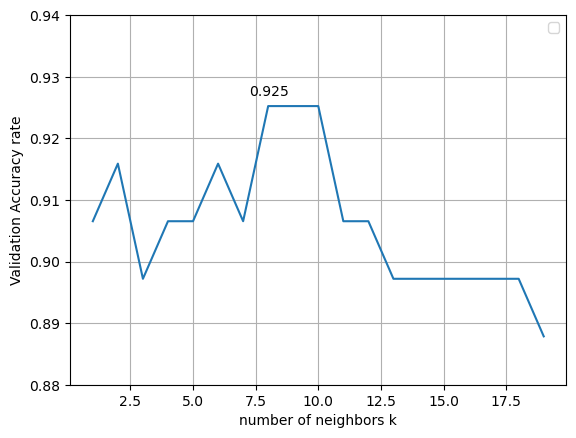

In [341]:
df.plot()
plt.ylabel("Validation Accuracy rate")
plt.xlabel("number of neighbors k")
plt.legend('')
plt.ylim(0.88,0.94)
plt.annotate('0.925',(7.25,0.927))
plt.grid();

In [342]:
# test accuracy rate

In [343]:
# rebuild model on the 
# combined (train+validation) set

model = KNeighborsClassifier(n_neighbors=8)
model.fit(X, y);

In [344]:
model.score(X_test,y_test)                                   

0.9300699300699301

### Holdout CV (Scaled data) searching for best K

In [345]:
from sklearn.preprocessing import MinMaxScaler

In [346]:
scaler = MinMaxScaler()

In [347]:
# Find min/max of each feature in Train set
scaler.fit(X_train);

In [348]:
# then transform data into (0,1) 
# by substracting the train set Min, 
# and dividing by the train set range

In [349]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [350]:
print(X_train_scaled.shape, 
      X_validation_scaled.shape, 
      X_test_scaled.shape)

(319, 30) (107, 30) (143, 30)


In [351]:
# Search best K

In [352]:
validation_accuracy_scaled = []

for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    score = model.score(X_validation_scaled,y_validation)
    validation_accuracy_scaled.append(score)

In [353]:
# find max
max1 = max(validation_accuracy_scaled)
max1

0.9813084112149533

In [354]:
# what k gives max accuracy?

In [355]:
validation_accuracy_scaled.index(max(validation_accuracy_scaled))+1

2

In [356]:
df = pd.DataFrame(validation_accuracy_scaled, 
                  columns = ['validation_acc_scaled'])
df.index = range(1,20)
df[:11]

,validation_acc_scaled
1,0.971963
2,0.981308
3,0.971963
4,0.981308
5,0.971963
6,0.981308
7,0.953271
8,0.953271
9,0.943925
10,0.953271


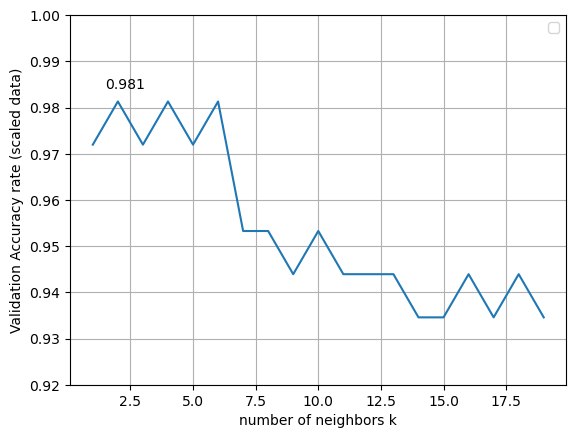

In [357]:
df.plot()
plt.ylabel("Validation Accuracy rate (scaled data)")
plt.xlabel("number of neighbors k")
plt.legend('')
plt.ylim(0.92,1.0)
plt.annotate('0.981',(1.5,0.984))
plt.grid();

In [358]:
# test accuracy rate

In [359]:
scaler = MinMaxScaler()
scaler.fit(X);

X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [360]:
print(X_scaled.shape, X_test_scaled.shape)

(426, 30) (143, 30)


In [361]:
# rebuild model on the 
# combined (train+validation) set

model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_scaled, y);

In [362]:
model2.score(X_test_scaled,y_test)                                   

0.9230769230769231

### 5-fold cross validation (no scaling) with known K=3 neighbors

In [363]:
y = cancer.target
X = cancer.data

In [364]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state=1)

In [365]:
model1 = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model1,X,y,cv=kfold)

In [366]:
# display all 5 test accuracy rates
scores

array([0.94736842, 0.89473684, 0.92982456, 0.94736842, 0.95575221])

In [367]:
# average test accuracy rate
scores.mean()

0.935010091600683

### 5-fold cross validation (no scaling) search to find best K

In [368]:
y = cancer.target
X = cancer.data

In [369]:
X_train,X_test,\
y_train,y_test = train_test_split(X,y,
                                  stratify=y,
                                  random_state=66)

In [370]:
val_acc_rate = []
for k in range(1,25):
    model1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model1,X_train,y_train,cv=kfold)
    val_acc_rate.append(scores.mean())

In [371]:
df1 = pd.DataFrame(val_acc_rate,
                   columns=['val_acc_rate'])
df1.index = range(1,25)
df1[:11]

,val_acc_rate
1,0.922599
2,0.917811
3,0.924925
4,0.927196
5,0.929603
6,0.929549
7,0.934254
8,0.936607
9,0.936607
10,0.936607


In [372]:
max3 = max(val_acc_rate)
max3

0.9413132694938442

In [373]:
val_acc_rate.index(max(val_acc_rate))

10

In [374]:
# k-fold cross validation selects k=11 neighbors

In [375]:
max3 = round(max3,3)
max3

0.941

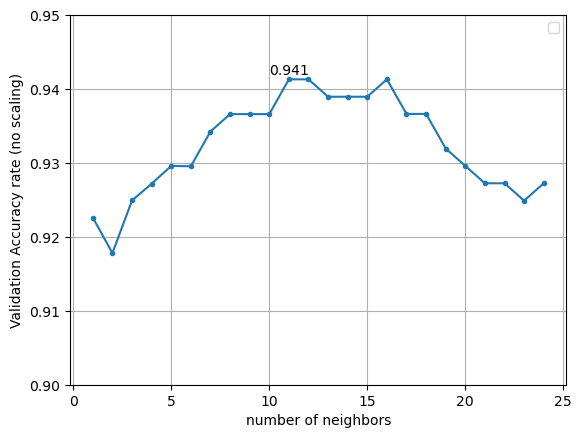

In [376]:
df1.plot(marker='o',ms=3)
plt.ylabel("Validation Accuracy rate (no scaling)")
plt.xlabel("number of neighbors")
plt.ylim(0.9,0.95)
plt.annotate(max3,(10,0.942),size=10)
plt.legend('')
plt.grid()

In [377]:
# Find test accuracy rate

In [378]:
# rebuild model on the 
# combined (train+validation) set

model2 = KNeighborsClassifier(n_neighbors=11)
model2.fit(X_train, y_train);

In [379]:
model2.score(X_test,y_test)                                   

0.916083916083916

### 5-fold cross validation (scaled data) no search for K

In [380]:
y = cancer.target
X = cancer.data

In [381]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state=1)

In [382]:
scaler = MinMaxScaler()
model1 = KNeighborsClassifier(n_neighbors=3)
pipe1 = Pipeline([('transformer1', scaler), ('estimator1', model1)])
scores = cross_val_score(pipe1,X,y,cv=kfold)

In [383]:
# show all test accuracy rates
scores

array([0.95614035, 0.99122807, 0.98245614, 0.96491228, 0.96460177])

In [384]:
# average test accuracy rate
scores.mean()

0.9718677224033534

### 5-fold cross validation (scaled data) searching to find best K

In [385]:
y = cancer.target
X = cancer.data

In [386]:
X_train,X_test,\
y_train,y_test = train_test_split(X,y,stratify=y,
                                  random_state=66)

In [387]:
val_acc_rate = []
for k in range(1,25):
    scaler = MinMaxScaler()
    model1 = KNeighborsClassifier(n_neighbors=k)
    pipe1 = Pipeline([('transformer1', scaler), 
                      ('estimator1', model1)])
    scores = cross_val_score(pipe1,X_train,y_train,cv=kfold)
    val_acc_rate.append(scores.mean())

In [388]:
df1 = pd.DataFrame(val_acc_rate,
                   columns=['val_acc_rate'])
df1.index = range(1,25)
df1[:11]

,val_acc_rate
1,0.964843
2,0.964870
3,0.969576
4,0.967223
5,0.976607
6,0.974254
7,0.974282
8,0.969549
9,0.967196
10,0.964870


In [389]:
max3 = max(val_acc_rate)
max3

0.9766073871409029

In [390]:
val_acc_rate.index(max(val_acc_rate))

4

In [391]:
# k-fold cross validation selects k=5 neighbors

In [392]:
max3 = round(max3,3)
max3

0.977

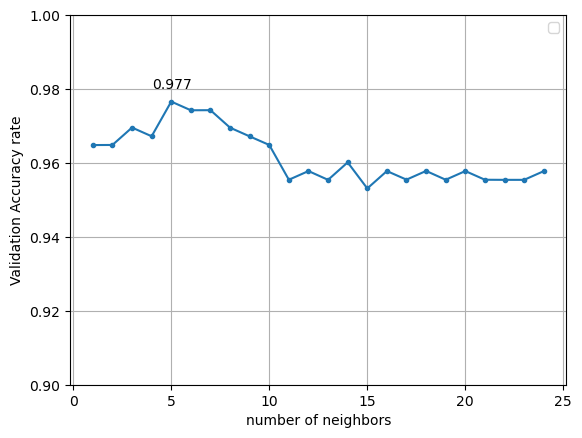

In [393]:
df1.plot(marker='o',ms=3)
plt.ylabel("Validation Accuracy rate")
plt.xlabel("number of neighbors")
plt.ylim(0.9,1)
plt.annotate(max3,(4,0.98),size=10)
plt.legend('')
plt.grid()

In [394]:
# Find test accuracy rate

In [395]:
scaler = MinMaxScaler()
scaler.fit(X_train);

In [396]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [398]:
# rebuild model on the 
# combined (train+validation) set

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train_scaled, y_train);

In [399]:
model2.score(X_test_scaled,y_test)                                   

0.9440559440559441